ANÁLISIS ESTADÍSTICO PRÁCTICA #3

En la primera parte del código se importan las librerías necesarias para análizar los datos, se mejora el tamaño y lo visual de los gráficos y se importa la base de datos.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_excel("C:/Users/vcamaclo/Downloads/dabe de datos.xlsx/dabe de datos.xlsx")

A continuación se organiza la información de la base de datos, limpiando los espacios extra y homologando las palabras en las diferentes variables

In [12]:
df.columns = df.columns.str.strip().str.replace('\xa0', ' ').str.replace(' +', ' ', regex=True)

# Tipo de ingreso
df['Tipo de ingreso'] = df['Tipo de ingreso'].str.strip().str.upper()
df['Tipo de ingreso'] = df['Tipo de ingreso'].replace({
    'URGENCIAS': 'URGENCIA'
})

# Situacion al alta
df['Situacion al alta'] = df['Situacion al alta'].str.strip().str.upper()
df['Situacion al alta'] = df['Situacion al alta'].replace({
    'ALTA MÉDICA': 'ALTA MEDICA',
    'MUERTO': 'FALLECIDO'
})

# Tipo servicio
df['Tipo servicio'] = df['Tipo servicio'].str.strip().str.upper()
df['Tipo servicio'] = df['Tipo servicio'].replace({
    'CIRUGÍA': 'CIRUGIA',
    'N/A': 'NO APLICA',
    'N0 APLICA': 'NO APLICA',
    'U. ADULTOS': 'URGENCIA ADULTOS',
    'URGENCIA - ADULTOS': 'URGENCIA ADULTOS',
    'URGENCIA ADULTO': 'URGENCIA ADULTOS',
    'URGENCIA ADULTOS.': 'URGENCIA ADULTOS',
    'URGENCIA PEDÍATRICAS': 'URGENCIA PEDIATRICAS'
})

#Sexo
df['Sexo'] = df['Sexo'].str.strip().str.upper()
df['Sexo'] = df['Sexo'].replace({
    'F': 'F',
    'M': 'M'
})

#Infecciones
df['Infecciones'] = df['Infecciones'].str.strip().str.upper()
df['Infecciones'] = df['Infecciones'].replace({
    'no': 'NO',
    'si': 'SI',
})

#Infección Quirurgica
df['Infección Quirurgica'] = df['Infección Quirurgica'].str.strip().str.upper()
df['Infección Quirurgica'] = df['Infección Quirurgica'].replace({
    'no': 'NO',
    'si': 'SI',
})

# Tipo GRD
df['Tipo GRD'] = df['Tipo GRD'].str.strip().str.upper()
df['Tipo GRD'] = df['Tipo GRD'].replace({
    'q': 'Q',
    'm': 'M',
})

Se hace una revisión inicial del dataset, mostrando cuántas columnas y filas tiene el archivo y los tipos de datos que contiene. También se cuentan los registros duplicados y cuenta los registros de faltan por cada columna

In [13]:
print("Tamaño del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nPrimeras filas:\n", df.head())

print("\nDuplicados:", df.duplicated().sum())
print("\nValores nulos por columna:\n", df.isnull().sum())

Tamaño del dataset: (27869, 68)

Tipos de datos:
 Num caso                     float64
Aseguradora -Código-           int64
Aseguradora -Descripción-     object
Edad                           int64
Grupo Edad                    object
                              ...   
Infecciones                   object
Infección Quirurgica          object
GRD -Código                    int64
GRD -Descripción              object
Tipo GRD                      object
Length: 68, dtype: object

Primeras filas:
    Num caso  Aseguradora -Código- Aseguradora -Descripción-  Edad Grupo Edad  \
0  413799.0                   204            Aseguradora_29    38      35-39   
1  412359.0                   313            Aseguradora_56    27      25-29   
2  412552.0                   313            Aseguradora_56    39      35-39   
3  414131.0                   227            Aseguradora_46    24      20-24   
4  410573.0                   227            Aseguradora_46    60      60-64   

  Sexo  Codigo de 

ANÁLISIS UNIVARIADO ESTADÍSTICO

Para variables númericas:
- Calcula estadísticas descriptivas como media, mediana, desviación estándar, mínimo y máximo.
- Genera histogramas para ver la distribución de los valores (ej. edades, días de estancia, etc.).


--- Edad ---
count    27869.000000
mean        57.733252
std         24.175389
min          0.000000
25%         42.000000
50%         63.000000
75%         77.000000
max        109.000000
Name: Edad, dtype: float64


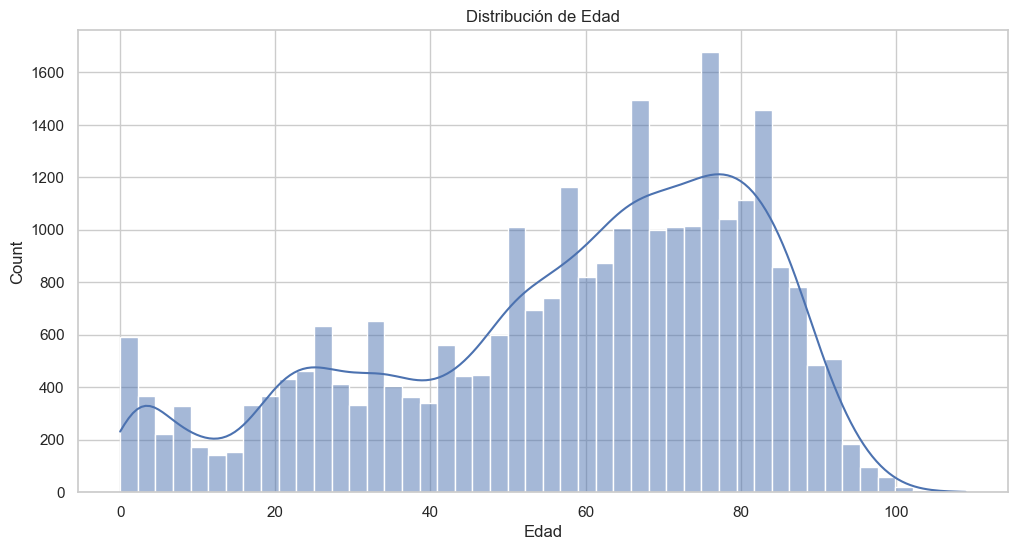


--- Días estancia ---
count    27869.000000
mean         8.452295
std          9.219085
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        174.000000
Name: Días estancia, dtype: float64


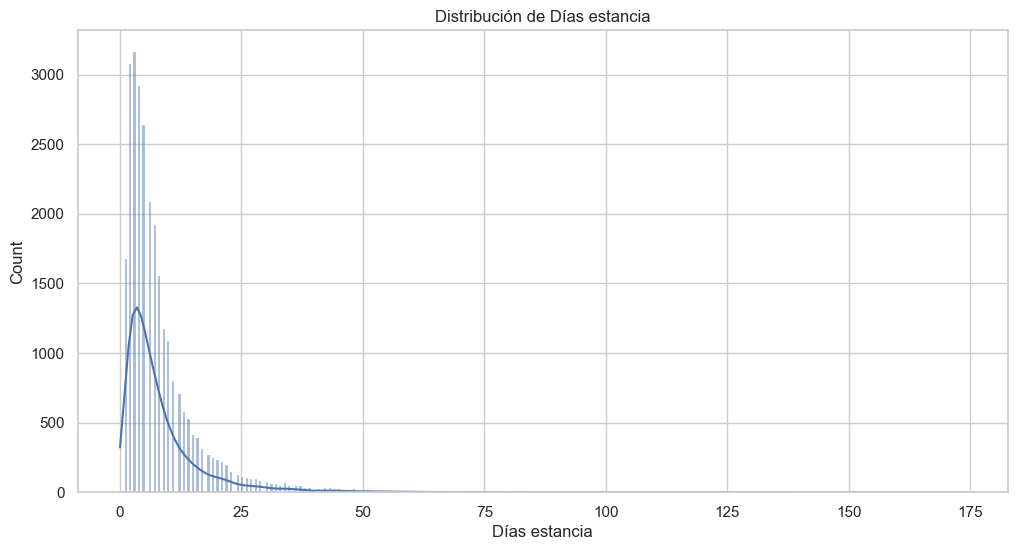


--- Días de Unidad Cuidado Intensivo ---
count    27869.000000
mean         0.380782
std          2.990207
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         92.000000
Name: Días de Unidad Cuidado Intensivo, dtype: float64


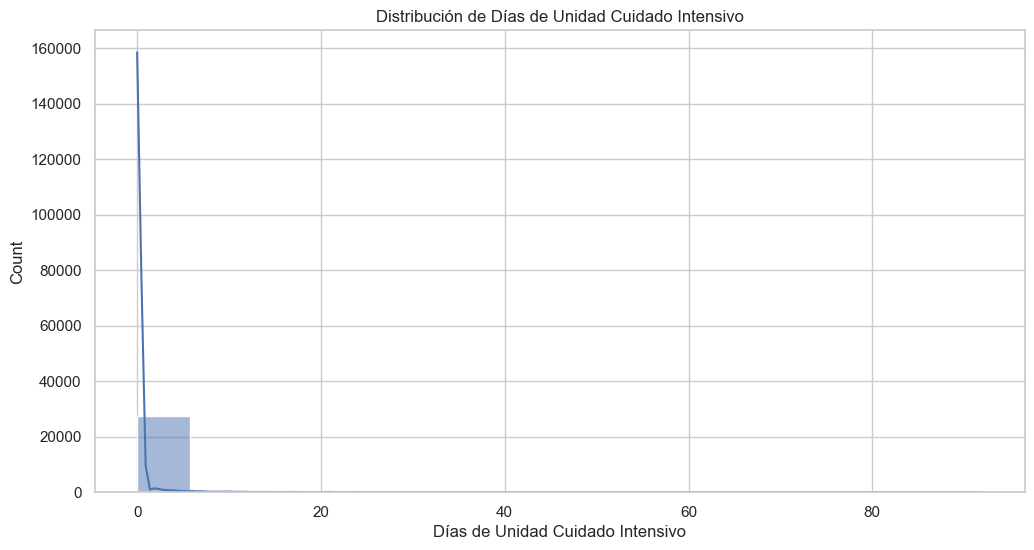

In [14]:
num_cols = ['Edad', 'Días estancia', 'Días de Unidad Cuidado Intensivo']

for col in num_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].describe())
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Distribución de {col}")
        plt.show()

Para variables categóricas:
- Muestra cuántas veces aparece cada categoría.
- Genera gráficos de barras para visualizarlo.


--- Sexo ---
Sexo
M    14355
F    13514
Name: count, dtype: int64


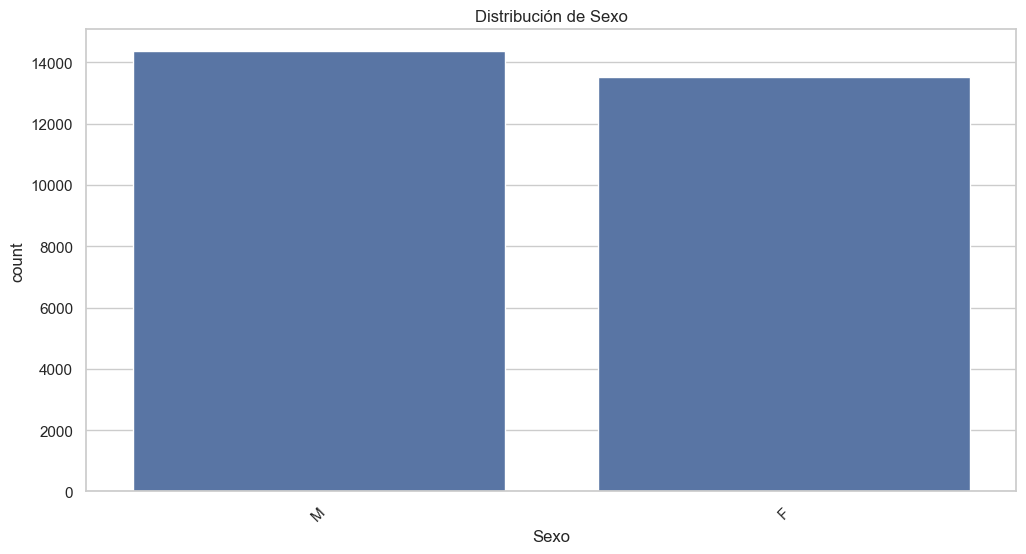


--- Tipo de ingreso ---
Tipo de ingreso
URGENCIA      25574
PROGRAMADO     2295
Name: count, dtype: int64


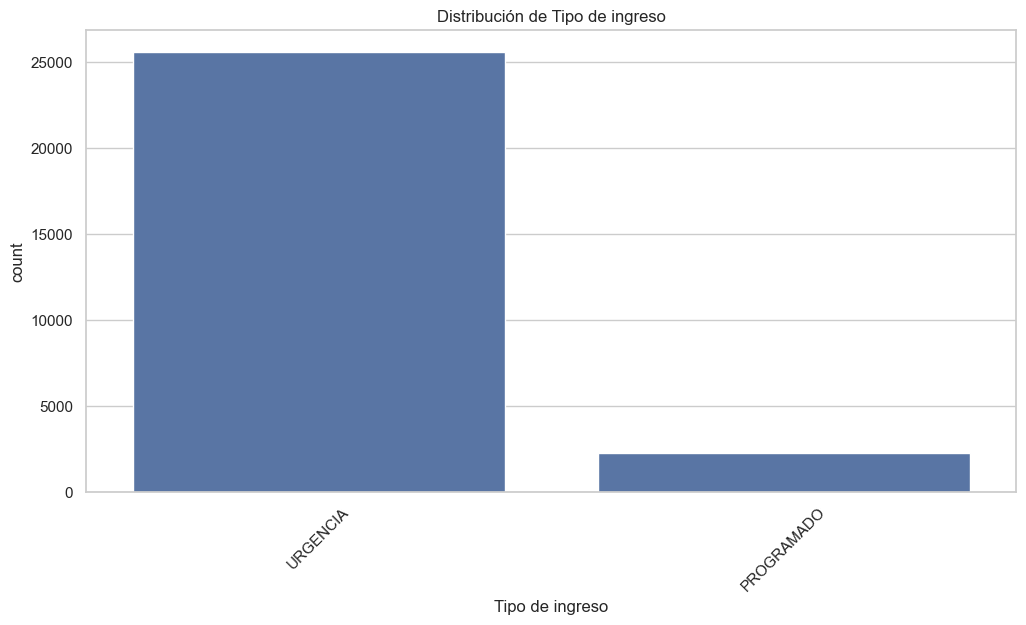


--- ServicioAlta ---
ServicioAlta
156    2031
24     1856
162    1699
20     1685
23     1617
126    1571
55     1569
59     1521
28     1504
44     1492
22     1372
297    1351
54     1233
38     1226
39     1194
29     1134
40      970
21      899
31      758
30      509
158     326
25      123
42       98
58       88
45       42
230       1
Name: count, dtype: int64


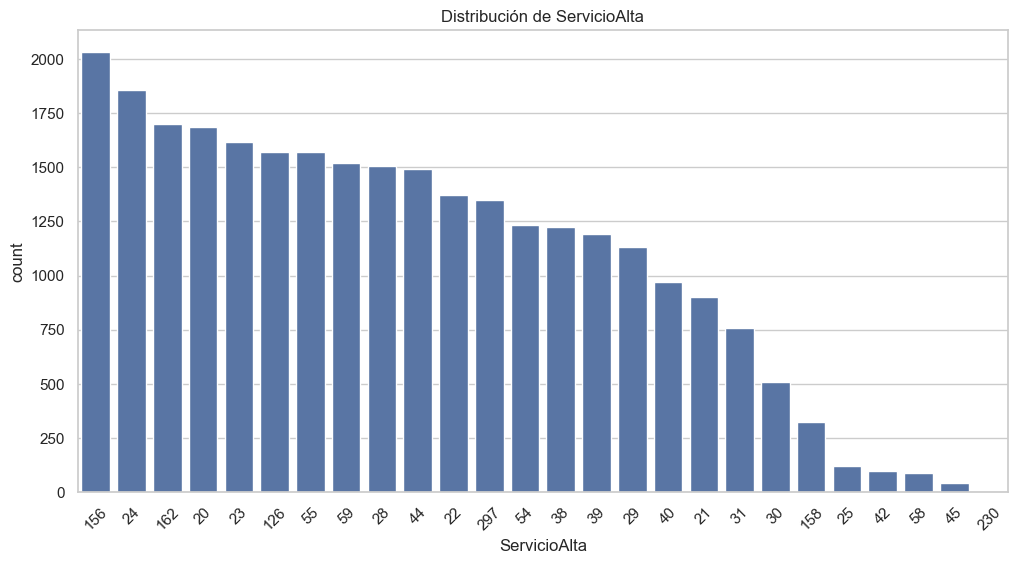


--- Situacion al alta ---
Situacion al alta
ALTA MEDICA    26373
FALLECIDO       1495
Name: count, dtype: int64


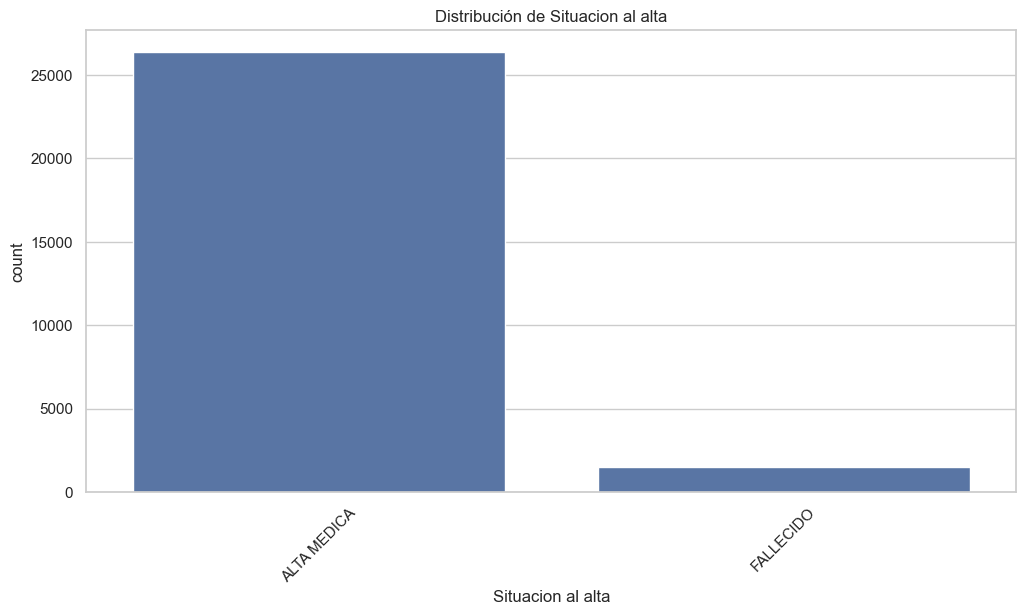


--- Infecciones ---
Infecciones
NO    27356
SI      513
Name: count, dtype: int64


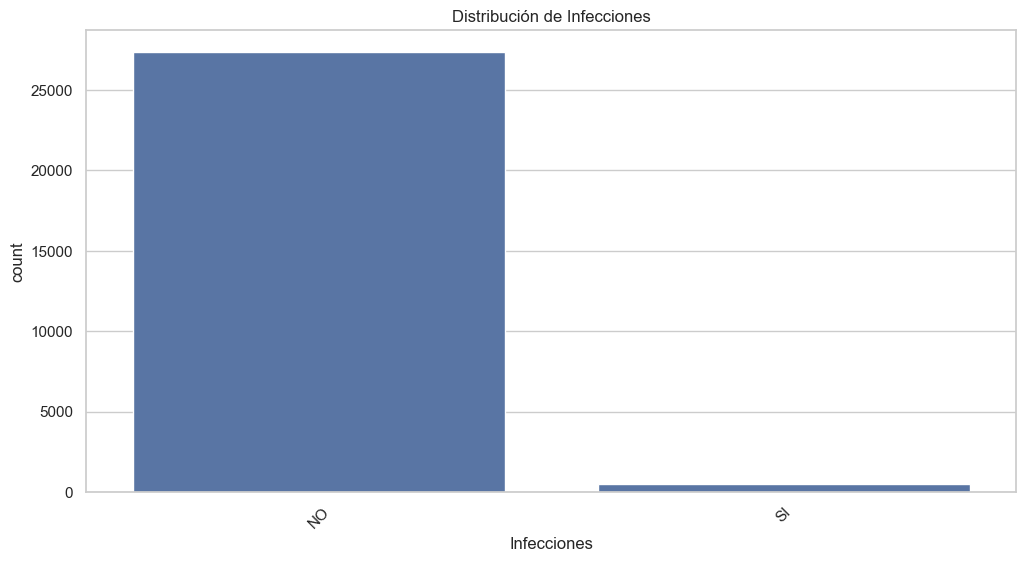


--- Tipo servicio ---
Tipo servicio
URGENCIA ADULTOS        24840
NO APLICA                2350
URGENCIA PEDIATRICAS      368
CIRUGIA                   309
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64


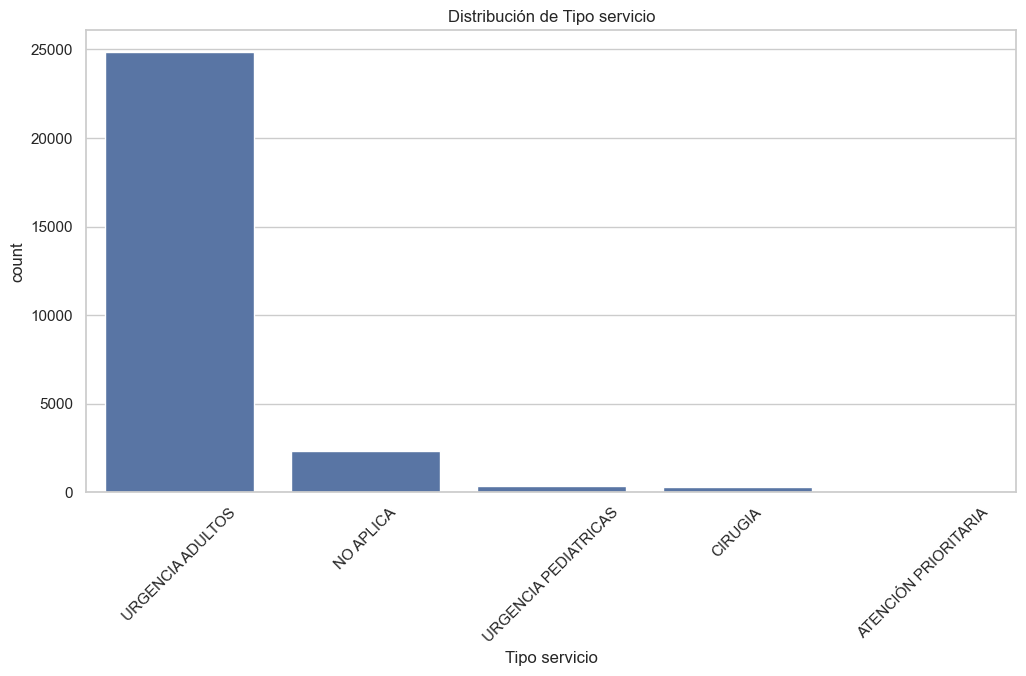

In [15]:
cat_cols = ['Sexo', 'Tipo de ingreso', 'ServicioAlta', 'Situacion al alta', 'Infecciones', 'Tipo servicio']

for col in cat_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts())
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Distribución de {col}")
        plt.xticks(rotation=45)
        plt.show()


INGENIERÍA DE CARACTERÍSTICAS

- Calcula el número de días de hospitalización.
- Calcula cuántos procedimientos (cirugías, exámenes, etc.) tuvo cada paciente.

In [16]:
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d%m%Y', errors='coerce')
df['Fecha de egreso'] = pd.to_datetime(df['Fecha de egreso'], format='%d%m%Y', errors='coerce')
df['Duración estancia'] = (df['Fecha de egreso'] - df['Fecha de ingreso']).dt.days

## Número de procedimientos
proc_cols = [col for col in df.columns if 'Proc' in col]
df['Num_Procedimientos'] = df[proc_cols].notna().sum(axis=1)


ANÁLISIS BIVARIADO

Edad vs Tipo GRD

- Compara visualmente cómo varía la edad entre los grupos GRD.

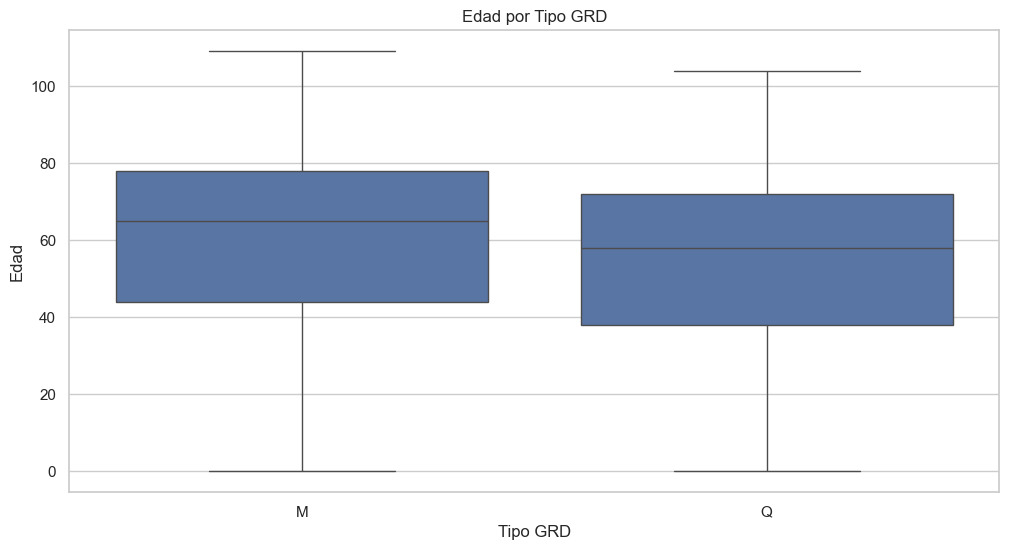

In [17]:
if 'Tipo GRD' in df.columns:
    sns.boxplot(data=df, x='Tipo GRD', y='Edad')
    plt.title("Edad por Tipo GRD")
    plt.show()

Dx principal de egreso vs Tipo GRD (top 10)

- Muestra los 10 diagnósticos principales de egreso más frecuentes y cómo se relacionan con el tipo de GRD.

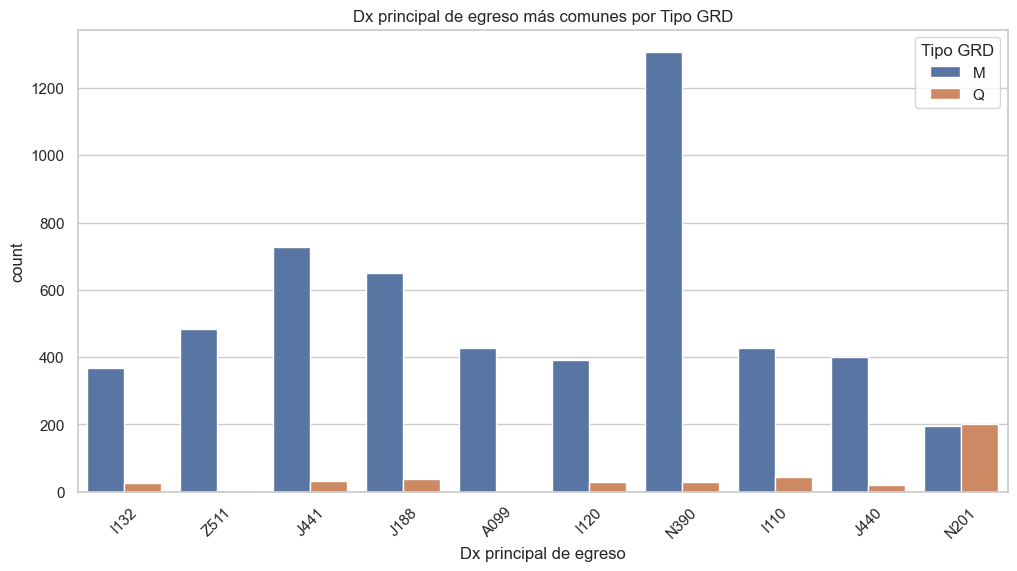

In [18]:
if 'Dx principal de egreso' in df.columns and 'Tipo GRD' in df.columns:
    top_dxs = df['Dx principal de egreso'].value_counts().head(10).index
    sns.countplot(data=df[df['Dx principal de egreso'].isin(top_dxs)],
                  x='Dx principal de egreso', hue='Tipo GRD')
    plt.title("Dx principal de egreso más comunes por Tipo GRD")
    plt.xticks(rotation=45)
    plt.show()

Correlación numérica
- Mide qué variables numéricas están correlacionadas entre sí (por ejemplo, edad vs días de estancia).

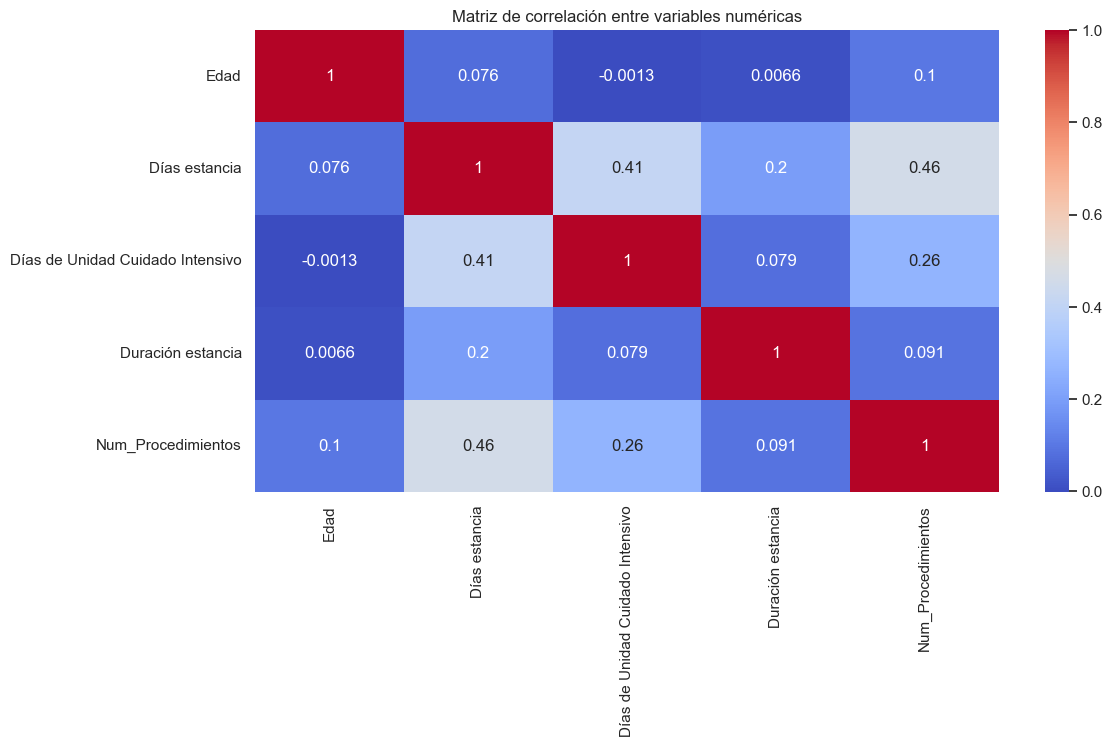

In [19]:
corr_vars = [col for col in ['Edad', 'Días estancia', 'Días de Unidad Cuidado Intensivo', 'Duración estancia', 'Num_Procedimientos'] if col in df.columns]
correlation = df[corr_vars].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Variables sugeridas
- Definimod qué columnas se usarán como input del modelo de predicción de acuerdo al análisis realizado con anterioridad.
- Crea un nuevo DataFrame df_modelo solo con estas columnas + la variable objetivo.

In [20]:
features = ['Edad', 'Sexo', 'Tipo de ingreso', 'Dx principal de egreso', 'Duración estancia',
            'Días de Unidad Cuidado Intensivo', 'Infecciones', 'Situacion al alta',
            'Num_Procedimientos', 'Tipo servicio']

features = [f for f in features if f in df.columns]

print("\nVariables sugeridas como input del modelo:")
print(features)

target = 'GRD -Código'

if target in df.columns and target not in features:
    features.append(target)

df_modelo = df[features].copy()


output_path = "C:/Users/vcamaclo/Downloads/dabe de datos.xlsx/datos_modelo_GRD.xlsx"
df_modelo.to_excel(output_path, index=False)

print(f"\nArchivo guardado exitosamente en: {output_path}")


Variables sugeridas como input del modelo:
['Edad', 'Sexo', 'Tipo de ingreso', 'Dx principal de egreso', 'Duración estancia', 'Días de Unidad Cuidado Intensivo', 'Infecciones', 'Situacion al alta', 'Num_Procedimientos', 'Tipo servicio']

Archivo guardado exitosamente en: C:/Users/vcamaclo/Downloads/dabe de datos.xlsx/datos_modelo_GRD.xlsx


Explicación variables:

1. Distribución de Edad
- Muestra cómo está distribuida la edad de los pacientes hospitalizados.
- Hay un pico claro entre los 60 y 85 años, lo que indica que la mayoría de los pacientes son adultos mayores.
- También hay registros en niños y jóvenes, pero en menor proporción.
*La edad es una variable altamente predictiva para el GRD, ya que influye directamente en la complejidad clínica, estancias hospitalarias, necesidad de UCI y procedimientos.*

2. Distribución de Días de Estancia
- Distribución asimétrica hacia la derecha (sesgo positivo).
- La mayoría de los pacientes están hospitalizados entre 1 y 15 días, con algunos casos extremos que llegan hasta 174 días.
Este indicador ayuda a entender la gravedad o complicaciones del caso. *Cuanto mayor es la estancia, es más probable que el GRD esté asociado a condiciones complejas o procedimientos quirúrgicos.*

3. Distribución de Días en UCI
- La mayoría de los pacientes no pasó por UCI (valor cero).
- Hay unos pocos con estancias prolongadas en cuidado intensivo, incluso de más de 60 días.
*Estancias en UCI son un indicador fuerte de severidad y están directamente vinculadas con GRD de alta complejidad.*

4. Distribución por Sexo
- Distribución muy balanceada entre hombres (M) y mujeres (F).
Aunque no determina directamente el GRD, *el sexo puede estar asociado con algunos diagnósticos, procedimientos y riesgos particulares.*

5. Distribución del Tipo de Ingreso
- Más del 90% de los ingresos son por urgencia.
- Solo un pequeño porcentaje es programado.
*El tipo de ingreso influye en la planeación del cuidado y el GRD esperado.*  Urgencias pueden tener más complicaciones inesperadas, mientras que los programados tienden a ser más controlados.

6. Distribución de Servicio de Alta
- Muestra qué servicios hospitalarios egresan más pacientes.
- Los servicios están identificados por un código numérico, y hay una clara concentración en unos pocos (como 156, 24, 162...).
*No se incluyó como variable predictora*

7. Distribución de Situación al Alta
- Más del 90% de los pacientes fueron dados de alta médica.
*La mortalidad puede estar fuertemente asociada a GRD complejos (e.g., con complicaciones severas), por lo tanto es un buen predictor.*

8. Distribución de Infecciones
- Casi todos los pacientes no presentan infecciones hospitalarias.
*Las infecciones complican los casos clínicos y aumentan la severidad, por lo tanto están asociadas a GRD con mayor peso o complejidad.*

9. Distribución del Tipo de Servicio
- Casi todos los pacientes pasaron por urgencias de adultos.
- Algunos por “no aplica” (posiblemente observación o tránsito), y una fracción menor en pediatría o cirugía.
*El tipo de servicio puede estar relacionado con el tipo de atención que recibe el paciente, y en consecuencia, con el GRD que se le asigna.*

10. Edad por Tipo GRD
- La edad es una variable relevante para clasificar el tipo de GRD.
- *Los pacientes mayores tienden a estar en GRD médicos, posiblemente por enfermedades crónicas o degenerativas.*
- Los quirúrgicos, aunque también incluyen personas mayores, abarcan un rango más amplio de edad (incluidos pacientes jóvenes con cirugías programadas o de urgencia).

11. Diagnotico principal de egreso por Tipo GRD
- *Ciertos diagnósticos principales de egreso son mucho más comunes en determinados tipos de GRD, lo que refuerza su poder predictivo.*

12. Matriz correlación
- Días estancia y Num_Procedimientos: Correlación de 0.46, lo que indica que a mayor número de procedimientos tiende a aumentar la estancia hospitalaria.
- Días estancia y Días de UCI: Correlación de 0.41, lo que sugiere que los pacientes en UCI permanecen más tiempo en el hospital.
- Num_Procedimientos y Días de UCI: Correlación de 0.26, una relación moderada.
- Edad y las demás variables: Correlaciones bajas (cerca de 0), lo que indica que la edad no tiene una relación fuerte con las demás variables numéricas aquí analizadas.
- *Se puede usar todas estas variables como predictores, ya que no están altamente correlacionadas entre sí.*
- *Las correlaciones más relevantes son entre estancia/días UCI y procedimientos, lo cual tiene sentido clínico.*




